In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [40]:
adult = pd.read_csv("adult_num.csv")

In [41]:
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [42]:
#standardise the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(adult.values)
scaled_features_adult = pd.DataFrame(scaled_features, index=adult.index, columns=adult.columns)
scaled_features_adult.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.178382e-16,4.058873e-17,1.471887e-16,-1.397692e-16,1.723930e-17,-3.371483e-17,-1.963971e-16,-7.921348e-17,1.309314e-17,1.016900e-16,-1.549355e-17,-3.524236e-16,1.833039e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-2.134224e+00,-2.660895e+00,-3.529656e+00,-1.734058e+00,-1.483582e+00,-9.001808e-01,-4.318909e+00,-1.422331e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-5.995541e+00,-5.631985e-01
25%,-7.757679e-01,-2.379060e-01,-3.354369e-01,-4.200596e-01,-4.062122e-01,-7.905095e-01,-9.001808e-01,3.936675e-01,-1.422331e+00,-1.459205e-01,-2.166595e-01,-3.542945e-02,2.513776e-01,-5.631985e-01
50%,-1.159546e-01,-2.379060e-01,1.813316e-01,-3.136003e-02,-4.062122e-01,-9.743724e-02,-2.778050e-01,3.936675e-01,7.030713e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,2.513776e-01,-5.631985e-01
75%,6.904838e-01,-2.379060e-01,4.397159e-01,7.460392e-01,9.216339e-01,8.266591e-01,9.669466e-01,3.936675e-01,7.030713e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,2.513776e-01,-5.631985e-01
max,3.769612e+00,2.922623e+00,1.214869e+00,2.300838e+00,2.249480e+00,1.750756e+00,2.211698e+00,3.936675e-01,7.030713e-01,1.339458e+01,1.059351e+01,4.742967e+00,7.445554e-01,1.775573e+00


In [43]:
#######################################
###             k-means             ###
#######################################

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_adult)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [44]:
kmeans.cluster_centers_

array([[-8.12681288e-03,  1.56214900e-01, -1.99672116e+00,
        -1.73651395e+00,  1.88873435e-01,  1.24536651e-01,
         1.22220692e-01, -6.84148136e-02,  4.19680867e-02,
        -1.10798119e-01, -9.00744287e-02, -3.05414331e-01,
        -3.14683572e-01, -4.29883598e-01],
       [ 1.22427745e-03, -2.35332575e-02,  3.00799431e-01,
         2.61600076e-01, -2.84531575e-02, -1.87610342e-02,
        -1.84121426e-02,  1.03064651e-02, -6.32235330e-03,
         1.66913697e-02,  1.35694144e-02,  4.60096577e-02,
         4.74060382e-02,  6.47605406e-02]])

In [45]:
# Compute the silhouette score
kmeans_silhouette = round(silhouette_score(scaled_features_adult, kmeans.labels_), 2)
kmeans_silhouette

0.17

In [22]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Using Elbow method to find the optimal number of cluster: 

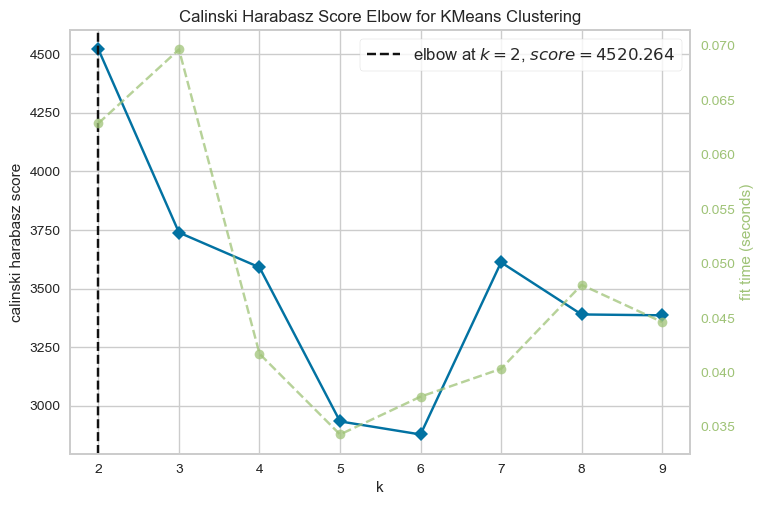

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_adult)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

c:\Users\frank\.conda\envs\py311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


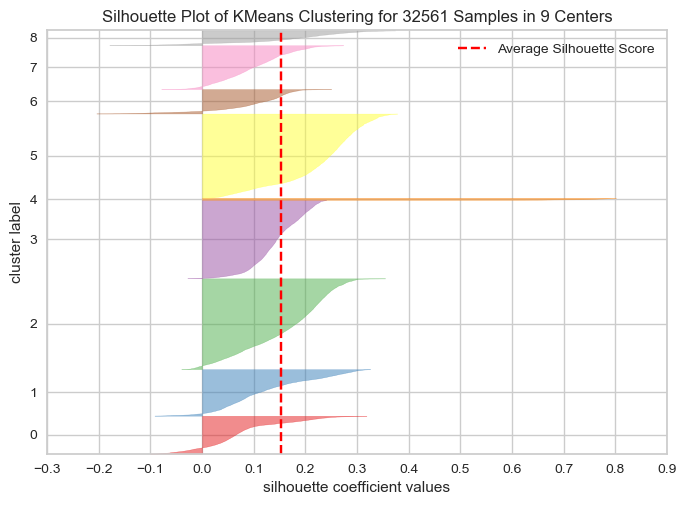

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 32561 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features_adult)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

View properties of each cluster


In [48]:
#append dataframe with cluster number 

scaled_features_adult[ 'cluster' ] = kmeans.labels_

In [49]:
#view properties of each cluster
cluster1 = scaled_features_adult.query("cluster == 0 " ) 
cluster2 = scaled_features_adult.query("cluster == 1" ) 

In [32]:
cluster1.head() 


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
3,1.057047,-0.237906,-2.402511,-1.197459,-0.406212,-0.328461,-0.900181,-1.962621,0.703071,-0.14592,-0.21666,-0.035429,0.251378,-0.563199,0
6,0.763796,-0.237906,-1.110590,-1.974858,0.257711,0.133587,-0.277805,-1.962621,-1.422331,-0.14592,-0.21666,-1.979184,-2.378904,-0.563199,0
15,-0.335892,-0.237906,-1.368974,-2.363558,-0.406212,1.519731,-0.900181,-4.318909,0.703071,-0.14592,-0.21666,0.369519,-1.885726,-0.563199,0
18,-0.042642,-0.237906,-2.402511,-1.197459,-0.406212,1.057683,-0.900181,0.393668,0.703071,-0.14592,-0.21666,0.774468,0.251378,-0.563199,0
22,-0.262580,-2.134224,-1.110590,-1.974858,-0.406212,-0.559485,-0.900181,-1.962621,0.703071,-0.14592,-0.21666,-0.035429,0.251378,-0.563199,0


In [50]:
cluster1.shape

(4262, 15)

In [51]:
cluster1.describe() 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
count,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.0
mean,-0.008532,0.155566,-1.997050,-1.737005,0.189013,0.124155,0.122461,-0.068523,0.041813,-0.110790,-0.090045,-0.305478,-0.313389,-0.429852,0.0
std,1.239310,1.058281,0.637240,0.664850,1.019502,0.953640,0.980902,1.040585,0.984075,0.347902,0.775415,1.084052,1.356883,0.542360,0.0
min,-1.582206,-2.134224,-2.660895,-3.529656,-1.734058,-1.483582,-0.900181,-4.318909,-1.422331,-0.145920,-0.216660,-3.194030,-5.995541,-0.563199,0.0
25%,-1.142331,-0.237906,-2.402511,-2.363558,-0.406212,-0.559485,-0.900181,0.393668,-1.422331,-0.145920,-0.216660,-0.845327,0.251378,-0.563199,0.0
50%,-0.189267,-0.237906,-2.144127,-1.586158,-0.406212,0.133587,-0.277805,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,0.0
75%,0.983734,-0.237906,-1.368974,-1.197459,0.921634,1.057683,0.966947,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,0.0
max,3.769612,2.922623,0.698100,0.746039,2.249480,1.750756,2.211698,0.393668,0.703071,13.394578,9.461864,4.742967,0.744555,1.775573,0.0


In [52]:
cluster2.head() 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
0,0.030671,1.658412,-0.335437,1.134739,0.921634,-1.483582,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.251378,-0.563199,1
1,0.837109,1.026306,-0.335437,1.134739,-0.406212,-0.790510,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.251378,-0.563199,1
2,-0.042642,-0.237906,0.181332,-0.420060,-1.734058,-0.328461,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378,-0.563199,1
4,-0.775768,-0.237906,-0.335437,1.134739,-0.406212,0.595635,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.337971,-0.563199,1
5,-0.115955,-0.237906,0.439716,1.523438,-0.406212,-0.790510,2.211698,0.393668,-1.422331,-0.145920,-0.21666,-0.035429,0.251378,-0.563199,1


In [53]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features_adult)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [54]:
scaled_features_adult.shape

(32561, 15)

In [55]:
scaled_features_adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
0,0.030671,1.658412,-0.335437,1.134739,0.921634,-1.483582,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.251378,-0.563199,1
1,0.837109,1.026306,-0.335437,1.134739,-0.406212,-0.790510,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.251378,-0.563199,1
2,-0.042642,-0.237906,0.181332,-0.420060,-1.734058,-0.328461,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378,-0.563199,1
3,1.057047,-0.237906,-2.402511,-1.197459,-0.406212,-0.328461,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.251378,-0.563199,0
4,-0.775768,-0.237906,-0.335437,1.134739,-0.406212,0.595635,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.337971,-0.563199,1


KeyError: np.int32(3)

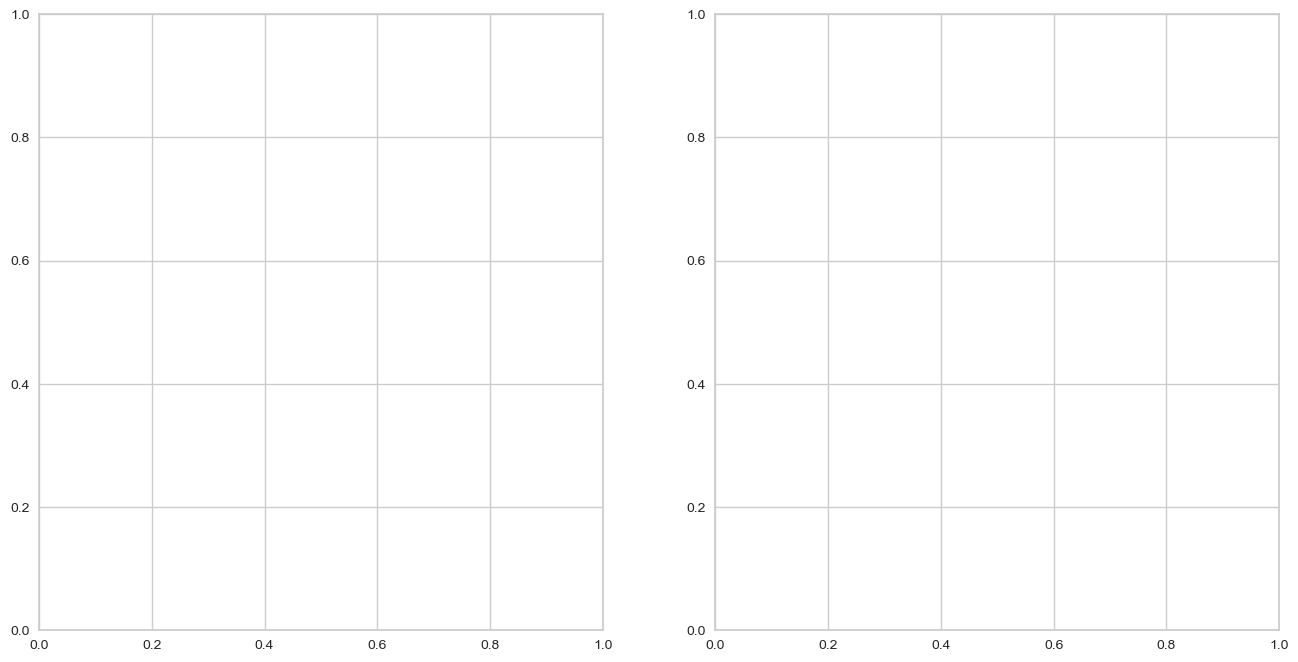

In [56]:
#visualising the clusters
fig, axes = plt.subplots(1, 2, figsize=(16,8))

fte_colors = {0: "#008fd5", 1: "#fc4f30"}

km_colors = [fte_colors[label] for label in kmeans.labels_]

axes[0].scatter(scaled_features_adult['age'], scaled_features_adult['hours-per-week'], c=km_colors)
#axes[1].scatter(scaled_features_adult['age'], scaled_features_adult['hours-per-week'], \
#                c=scaled_features_adult['k_means'], cmap=plt.cm.Set1)
axes[1].scatter(scaled_features_adult['age'], scaled_features_adult['hours-per-week'], c=kmeans.labels_, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)




In [57]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [58]:
#append dataframe with cluster number
scaled_features_adult['cluster'] = kmeans.labels_

In [59]:
kmeans.labels_ == 0

array([False, False, False, ..., False, False, False])

In [60]:
#view proterties of each cluster
cluster1=scaled_features_adult.query("cluster == 0")
cluster2=scaled_features_adult.query("cluster == 1")

In [61]:
cluster1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
3,1.057047,-0.237906,-2.402511,-1.197459,-0.406212,-0.328461,-0.900181,-1.962621,0.703071,-0.14592,-0.21666,-0.035429,0.251378,-0.563199,0
6,0.763796,-0.237906,-1.110590,-1.974858,0.257711,0.133587,-0.277805,-1.962621,-1.422331,-0.14592,-0.21666,-1.979184,-2.378904,-0.563199,0
15,-0.335892,-0.237906,-1.368974,-2.363558,-0.406212,1.519731,-0.900181,-4.318909,0.703071,-0.14592,-0.21666,0.369519,-1.885726,-0.563199,0
18,-0.042642,-0.237906,-2.402511,-1.197459,-0.406212,1.057683,-0.900181,0.393668,0.703071,-0.14592,-0.21666,0.774468,0.251378,-0.563199,0
22,-0.262580,-2.134224,-1.110590,-1.974858,-0.406212,-0.559485,-0.900181,-1.962621,0.703071,-0.14592,-0.21666,-0.035429,0.251378,-0.563199,0


In [62]:
cluster1.shape

(4227, 15)

In [63]:
cluster1.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
count,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.0
mean,-0.015776,0.153739,-2.002556,-1.740829,0.190015,0.122000,0.126069,-0.070120,0.040360,-0.119020,-0.095487,-0.314324,-0.310326,-0.441474,0.0
std,1.238359,1.056620,0.629494,0.659965,1.018592,0.952082,0.980610,1.042507,0.984668,0.179315,0.755589,1.066999,1.350454,0.519551,0.0
min,-1.582206,-2.134224,-2.660895,-3.529656,-1.734058,-1.483582,-0.900181,-4.318909,-1.422331,-0.145920,-0.216660,-3.194030,-5.995541,-0.563199,0.0
25%,-1.142331,-0.237906,-2.402511,-2.363558,-0.406212,-0.559485,-0.900181,0.393668,-1.422331,-0.145920,-0.216660,-0.845327,0.251378,-0.563199,0.0
50%,-0.189267,-0.237906,-2.144127,-1.586158,-0.406212,0.133587,-0.277805,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,0.0
75%,0.983734,-0.237906,-1.368974,-1.197459,0.921634,1.057683,0.966947,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,0.0
max,3.769612,2.922623,0.698100,-0.420060,2.249480,1.750756,2.211698,0.393668,0.703071,5.447715,9.461864,4.742967,0.744555,1.775573,0.0


In [64]:
cluster2.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
7,0.983734,1.026306,0.181332,-0.420060,-0.406212,-0.790510,-0.900181,0.393668,0.703071,-0.145920,-0.21666,0.369519,0.251378,1.775573,1
8,-0.555830,-0.237906,0.439716,1.523438,0.921634,0.595635,-0.277805,0.393668,-1.422331,1.761142,-0.21666,0.774468,0.251378,1.775573,1
9,0.250608,-0.237906,-0.335437,1.134739,-0.406212,-0.790510,-0.900181,0.393668,0.703071,0.555214,-0.21666,-0.035429,0.251378,1.775573,1
10,-0.115955,-0.237906,1.214869,-0.031360,-0.406212,-0.790510,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,3.204161,0.251378,1.775573,1
11,-0.629143,1.658412,-0.335437,1.134739,-0.406212,0.595635,-0.900181,-3.140765,0.703071,-0.145920,-0.21666,-0.035429,-3.036474,1.775573,1


In [65]:
cluster2.shape

(6814, 15)

In [66]:
cluster2.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
count,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.0
mean,0.442357,-0.104416,0.208217,0.676959,-0.364802,0.033501,-0.742075,0.146074,0.592653,0.442857,0.291424,0.487831,0.051689,1.773514,1.0
std,0.765447,0.909255,0.628257,0.853073,0.557071,0.934336,0.474690,0.837289,0.471725,2.101798,1.516961,0.872538,0.933328,0.069375,0.0
min,-1.288956,-2.134224,-2.660895,-2.363558,-1.734058,-1.483582,-0.900181,-4.318909,-1.422331,-0.145920,-0.216660,-3.194030,-5.995541,-0.563199,1.0
25%,-0.115955,-0.237906,-0.335437,-0.031360,-0.406212,-0.790510,-0.900181,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,1.775573,1.0
50%,0.397233,-0.237906,0.181332,1.134739,-0.406212,0.133587,-0.900181,0.393668,0.703071,-0.145920,-0.216660,0.369519,0.251378,1.775573,1.0
75%,0.910422,-0.237906,0.439716,1.134739,-0.406212,0.826659,-0.900181,0.393668,0.703071,-0.145920,-0.216660,0.774468,0.251378,1.775573,1.0
max,3.769612,2.922623,1.214869,2.300838,2.249480,1.750756,2.211698,0.393668,0.703071,13.394578,10.593507,4.742967,0.744555,1.775573,1.0


In [67]:
kmeans.cluster_centers_

array([[-1.57763553e-02,  1.53739438e-01, -2.00255650e+00,
        -1.74082904e+00,  1.90014908e-01,  1.22000126e-01,
         1.26069297e-01, -7.01204703e-02,  4.03602086e-02,
        -1.19019662e-01, -9.54873242e-02, -3.14323942e-01,
        -3.10326238e-01, -4.41473947e-01, -1.22124533e-15],
       [ 4.42266966e-01, -1.04210931e-01,  2.08296434e-01,
         6.76891374e-01, -3.64796187e-01,  3.34187701e-02,
        -7.42508649e-01,  1.46037640e-01,  5.92948500e-01,
         4.42942998e-01,  2.91498373e-01,  4.87669577e-01,
         5.16598205e-02,  1.77351321e+00,  9.96624101e-01],
       [-4.01689568e-01,  1.07817120e-02,  3.70626878e-01,
         1.37605086e-01,  5.06395344e-01, -4.03660251e-02,
         9.65435799e-01, -1.58941586e-01, -9.17322043e-01,
        -1.12909832e-01, -9.09769751e-02, -3.82155776e-01,
         3.07345679e-02, -3.85459740e-01,  9.99159742e-01],
       [ 1.25441145e-01, -5.12030062e-03,  2.84541925e-01,
         1.17755350e-01, -3.46145895e-01, -2.87711489

In [68]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [69]:
cluster1.keys()

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'cluster'],
      dtype='object')

In [70]:
len(cluster1.keys())

15

In [71]:
cluster1_mean

array([-1.57763553e-02,  1.53739438e-01, -2.00255650e+00, -1.74082904e+00,
        1.90014908e-01,  1.22000126e-01,  1.26069297e-01, -7.01204703e-02,
        4.03602086e-02, -1.19019662e-01, -9.54873242e-02, -3.14323942e-01,
       -3.10326238e-01, -4.41473947e-01, -1.22124533e-15])

In [72]:
cluster2_mean

array([ 0.44226697, -0.10421093,  0.20829643,  0.67689137, -0.36479619,
        0.03341877, -0.74250865,  0.14603764,  0.5929485 ,  0.442943  ,
        0.29149837,  0.48766958,  0.05165982,  1.77351321,  0.9966241 ])

In [73]:
cluster1_mean_p1 = cluster1_mean[:8]

In [74]:
cluster1_mean_p1

array([-0.01577636,  0.15373944, -2.0025565 , -1.74082904,  0.19001491,
        0.12200013,  0.1260693 , -0.07012047])

In [75]:
cluster2_mean_p1 = cluster2_mean[:8]

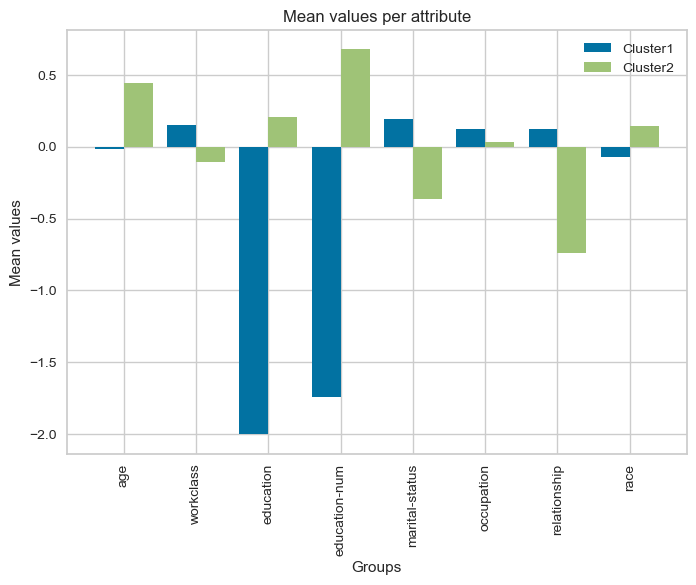

In [76]:
X = cluster1.keys()[:8]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [77]:
cluster1_mean_p2 = cluster1_mean[8:]
cluster2_mean_p2 = cluster2_mean[8:]

In [78]:
cluster1_mean_p2

array([ 4.03602086e-02, -1.19019662e-01, -9.54873242e-02, -3.14323942e-01,
       -3.10326238e-01, -4.41473947e-01, -1.22124533e-15])

In [79]:
cluster1.keys()[8:-2]

Index(['sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (7,).

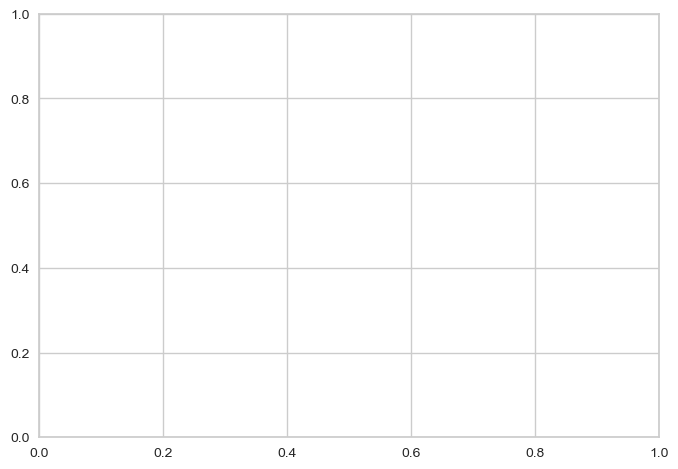

In [80]:
X = cluster1.keys()[8:-1]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [81]:
######################################################
###             Hierarchical Clustering            ###
######################################################

from sklearn.cluster import AgglomerativeClustering

X = scaled_features_adult.sample(frac=0.1, replace=False, random_state=1)

# setting distance_threshold=0 ensures we compute the full tree.
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#change the parameters
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(X)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,0
,compute_distances,False


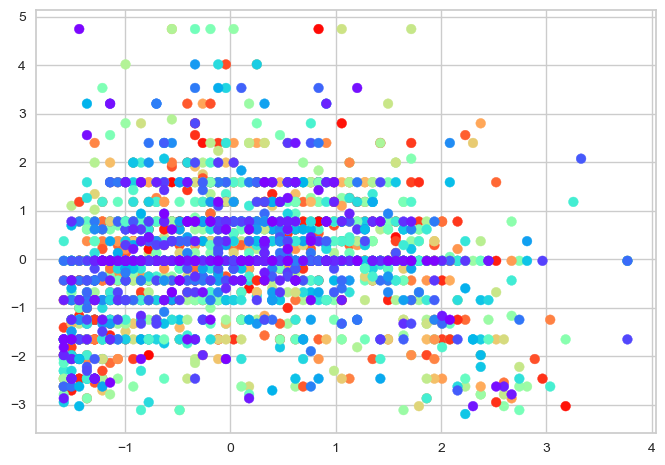

In [82]:
plt.scatter(X['age'],X['hours-per-week'], c=cluster.labels_, cmap='rainbow')

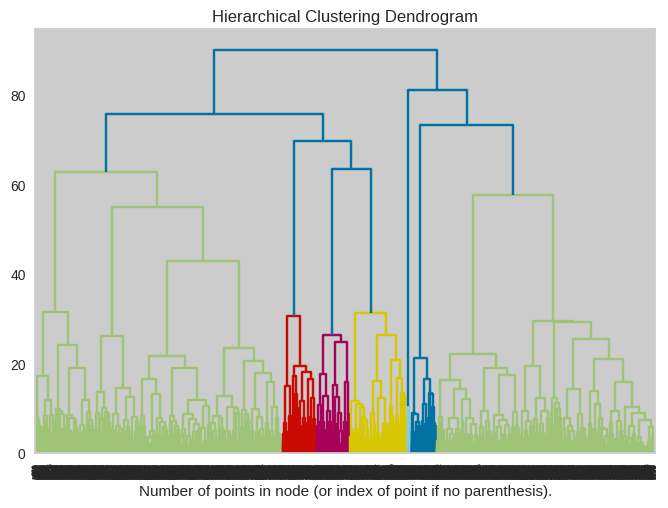

In [41]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [42]:
cluster.labels_

array([1641, 2818, 3199, ...,    2,    1,    0])

In [43]:
#change the parameters
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(X)

array([0, 0, 1, ..., 1, 0, 0])

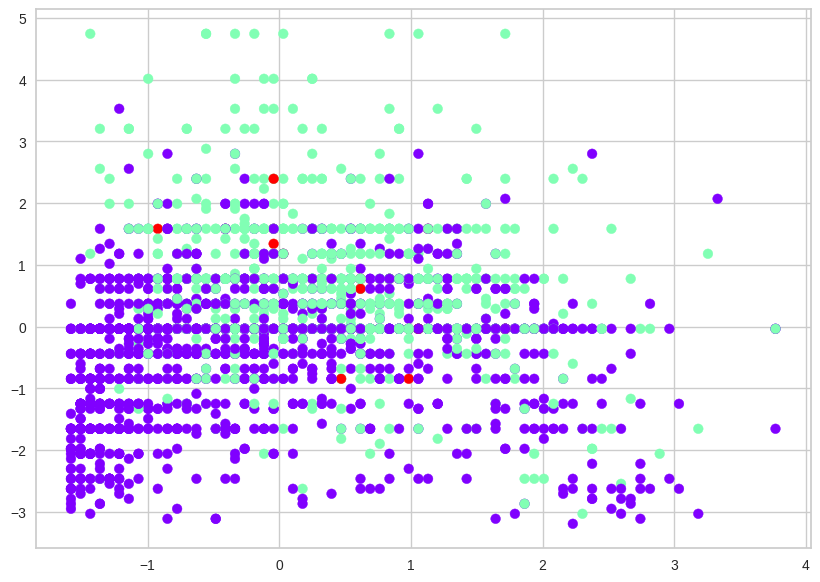

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(X['age'],X['hours-per-week'], c=cluster.labels_, cmap='rainbow')

In [45]:
#append dataframe with cluster number
X['cluster_no'] = cluster.labels_

In [46]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster,cluster_no
9646,1.716860,1.026306,-1.368974,-2.363558,2.249480,0.133587,-0.277805,0.393668,-1.422331,-0.145920,-0.21666,2.070304,0.251378,-0.563199,0,0
709,-1.508894,-0.237906,-2.402511,-1.197459,0.921634,0.133587,0.344571,0.393668,0.703071,-0.145920,-0.21666,-1.250276,0.251378,-0.563199,0,0
7385,-0.995706,-0.237906,-0.335437,1.134739,0.921634,-0.559485,0.966947,0.393668,0.703071,3.622167,-0.21666,0.774468,0.251378,1.775573,1,1
16671,-0.409205,-0.237906,0.181332,-0.420060,-0.406212,0.595635,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378,-0.563199,1,1
21932,-0.189267,-0.237906,-2.402511,-1.197459,0.921634,-0.097437,1.589322,0.393668,-1.422331,-0.145920,-0.21666,-0.035429,0.251378,-0.563199,0,0


In [47]:
X.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster,cluster_no
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,-0.006526,-0.004361,0.001510,0.002186,0.004662,-0.013854,0.004137,-0.018828,-0.008442,0.003031,-0.015783,-0.003640,-0.007632,-0.031660,0.872236,0.404484
std,1.000063,0.991248,0.995333,0.983264,1.004701,1.007733,0.998428,1.031445,1.003150,1.052472,0.959435,1.006297,1.017364,0.980260,0.333878,0.502007
min,-1.582206,-2.134224,-2.660895,-3.529656,-1.734058,-1.483582,-0.900181,-4.318909,-1.422331,-0.145920,-0.216660,-3.194030,-5.995541,-0.563199,0.000000,0.000000
25%,-0.794096,-0.237906,-0.335437,-0.420060,-0.406212,-1.021534,-0.900181,0.393668,-1.422331,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,1.000000,0.000000
50%,-0.115955,-0.237906,0.181332,-0.031360,-0.406212,-0.097437,-0.277805,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,1.000000,0.000000
75%,0.617171,-0.237906,0.439716,0.746039,0.921634,0.826659,0.966947,0.393668,0.703071,-0.145920,-0.216660,0.369519,0.251378,-0.563199,1.000000,1.000000
max,3.769612,2.922623,1.214869,2.300838,2.249480,1.750756,2.211698,0.393668,0.703071,13.394578,6.791584,4.742967,0.744555,1.775573,1.000000,2.000000


In [48]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")
cluster3=X.query("cluster_no == 2")

In [49]:
cluster1.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster,cluster_no
count,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.0
mean,-0.198258,0.073463,-0.162477,-0.175955,0.354399,0.038084,0.434572,-0.264937,-0.350398,-0.096951,-0.199100,-0.294001,-0.173590,-0.309842,0.797649,0.0
std,1.050729,1.111977,1.125954,1.040914,1.051416,1.038973,0.980643,1.243329,1.062933,0.253872,0.275987,0.920822,1.272897,0.727066,0.401855,0.0
min,-1.582206,-2.134224,-2.660895,-3.529656,-1.734058,-1.483582,-0.900181,-4.318909,-1.422331,-0.145920,-0.216660,-3.194030,-5.995541,-0.563199,0.000000,0.0
25%,-1.069018,-0.237906,-0.593821,-0.420060,-0.406212,-0.790510,-0.277805,0.393668,-1.422331,-0.145920,-0.216660,-0.683348,0.251378,-0.563199,1.000000,0.0
50%,-0.409205,-0.237906,0.181332,-0.420060,0.921634,0.133587,0.344571,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,1.000000,0.0
75%,0.470546,-0.237906,0.439716,0.357340,0.921634,1.057683,0.966947,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,1.000000,0.0
max,3.769612,2.922623,1.214869,2.300838,2.249480,1.750756,2.211698,0.393668,0.703071,3.622167,5.245502,3.528120,0.744555,1.775573,1.000000,0.0


In [50]:
cluster2.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster,cluster_no
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0
mean,0.280769,-0.121946,0.245676,0.252351,-0.524899,-0.095814,-0.645595,0.359638,0.507289,-0.032396,0.267096,0.430278,0.248554,0.367928,0.984387,1.0
std,0.842218,0.761544,0.688697,0.805332,0.633685,0.955355,0.589836,0.286948,0.614883,0.424186,1.446518,0.971772,0.129445,1.145303,0.124020,0.0
min,-1.582206,-2.134224,-2.660895,-3.140957,-1.734058,-1.483582,-0.900181,-3.140765,-1.422331,-0.145920,-0.216660,-3.032051,-1.885726,-0.563199,0.000000,1.0
25%,-0.335892,-0.237906,-0.335437,-0.420060,-0.406212,-1.021534,-0.900181,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,1.000000,1.0
50%,0.250608,-0.237906,0.181332,-0.031360,-0.406212,-0.328461,-0.900181,0.393668,0.703071,-0.145920,-0.216660,-0.035429,0.251378,-0.563199,1.000000,1.0
75%,0.837109,-0.237906,0.956484,1.134739,-0.406212,0.595635,-0.900181,0.393668,0.703071,-0.145920,-0.216660,0.774468,0.251378,1.775573,1.000000,1.0
max,3.769612,2.922623,1.214869,2.300838,2.249480,1.750756,2.211698,0.393668,0.703071,3.622167,6.791584,4.742967,0.744555,1.775573,1.000000,1.0


In [51]:
cluster3.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster,cluster_no
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,18.000000,1.800000e+01,18.0,18.0
mean,0.393161,-0.097438,0.454071,1.566627,-0.332443,0.172091,-0.554417,-0.195405,0.466916,13.394578,-2.166595e-01,0.684480,-0.196136,1.775573e+00,1.0,2.0
std,0.661236,0.670206,0.549706,0.809753,0.716114,0.816794,0.746308,1.355393,0.687314,0.000000,8.568076e-17,0.912027,1.528477,6.854460e-16,0.0,0.0
min,-0.922393,-2.134224,-0.335437,-0.420060,-1.734058,-1.483582,-0.900181,-3.140765,-1.422331,13.394578,-2.166595e-01,-0.845327,-5.831149,1.775573e+00,1.0,2.0
25%,-0.042642,-0.237906,-0.077053,1.231914,-0.406212,-0.790510,-0.900181,0.393668,0.703071,13.394578,-2.166595e-01,-0.035429,0.251378,1.775573e+00,1.0,2.0
50%,0.397233,-0.237906,0.698100,1.912138,-0.406212,0.595635,-0.900181,0.393668,0.703071,13.394578,-2.166595e-01,0.774468,0.251378,1.775573e+00,1.0,2.0
75%,0.947078,0.236173,0.956484,1.912138,-0.406212,0.595635,-0.277805,0.393668,0.703071,13.394578,-2.166595e-01,1.523624,0.251378,1.775573e+00,1.0,2.0
max,1.716860,1.026306,0.956484,2.300838,0.921634,1.057683,2.211698,0.393668,0.703071,13.394578,-2.166595e-01,2.394264,0.744555,1.775573e+00,1.0,2.0


In [52]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())
cluster3_mean = np.array(cluster3.mean())

In [53]:
cluster1_mean

array([-0.19825801,  0.07346347, -0.16247658, -0.17595548,  0.3543987 ,
        0.03808431,  0.43457196, -0.26493733, -0.35039827, -0.0969512 ,
       -0.19910014, -0.29400076, -0.17359024, -0.30984156,  0.79764946,
        0.        ])

In [54]:
cluster1_mean_p1 = cluster1_mean[:8]
cluster2_mean_p1 = cluster2_mean[:8]
cluster3_mean_p1 = cluster3_mean[:8]

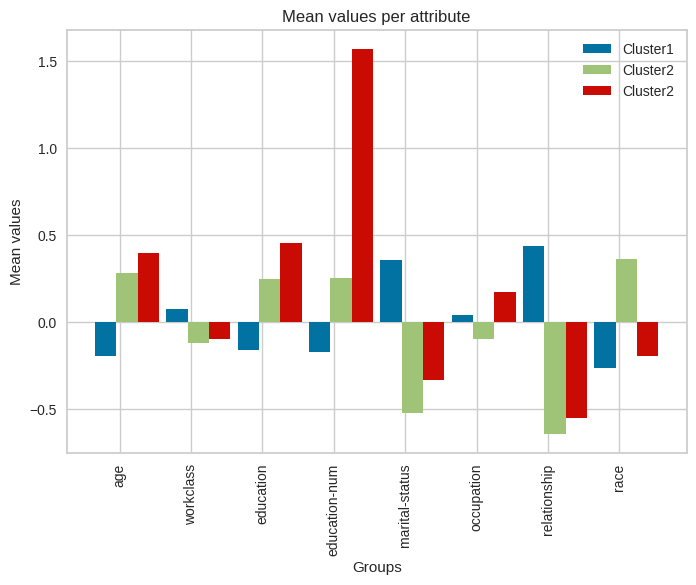

In [55]:
X = cluster1.keys()[:8]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')
plt.bar(X_axis + 0.4, cluster3_mean_p1, 0.3, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()



In [56]:
cluster1.keys()

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income', 'cluster',
       'cluster_no'],
      dtype='object')

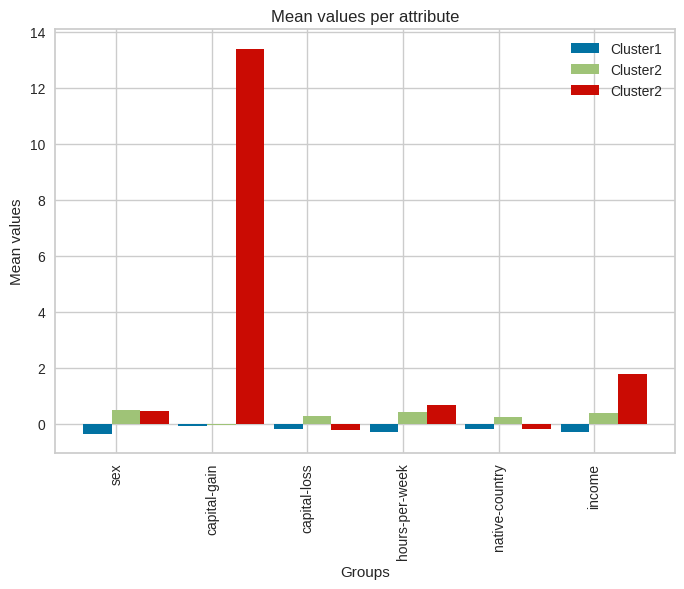

In [57]:
cluster1_mean_p2 = cluster1_mean[8:-2]
cluster2_mean_p2 = cluster2_mean[8:-2]
cluster3_mean_p2 = cluster3_mean[8:-2]

X = cluster1.keys()[8:-2]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')
plt.bar(X_axis + 0.4, cluster3_mean_p2, 0.3, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()